# RDFIA TME 9 : Visualization of Neural Networks


In [1]:
import os
import random
from pathlib import Path

import torch
from torch.nn import functional as F
import torchvision
import torchvision.transforms as T
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from PIL import Image

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['savefig.dpi'] = 150

## Loading the model

In [2]:
from utils import *

# Set URL for pretrained model SqueezeNet (Iandola et al (2016))
# This is the SqueezeNet network from Iandola et al (2016) trained on ImageNet,
# it achieve comparable results to AlexNet on ImageNet while being very compact
torchvision.models.vgg.model_urls[
    "squeezenet1_1"] = "http://webia.lip6.fr/~douillard/rdfia/squeezenet1_1-f364aa15.pth"
os.environ["TORCH_HOME"] = "./pytorch_models"

# loading the model
model = torchvision.models.squeezenet1_1(pretrained=True)
# put in in test mode
model.eval()
# freeze the paramaters
for param in model.parameters():
    param.requires_grad = False

## Loading example images

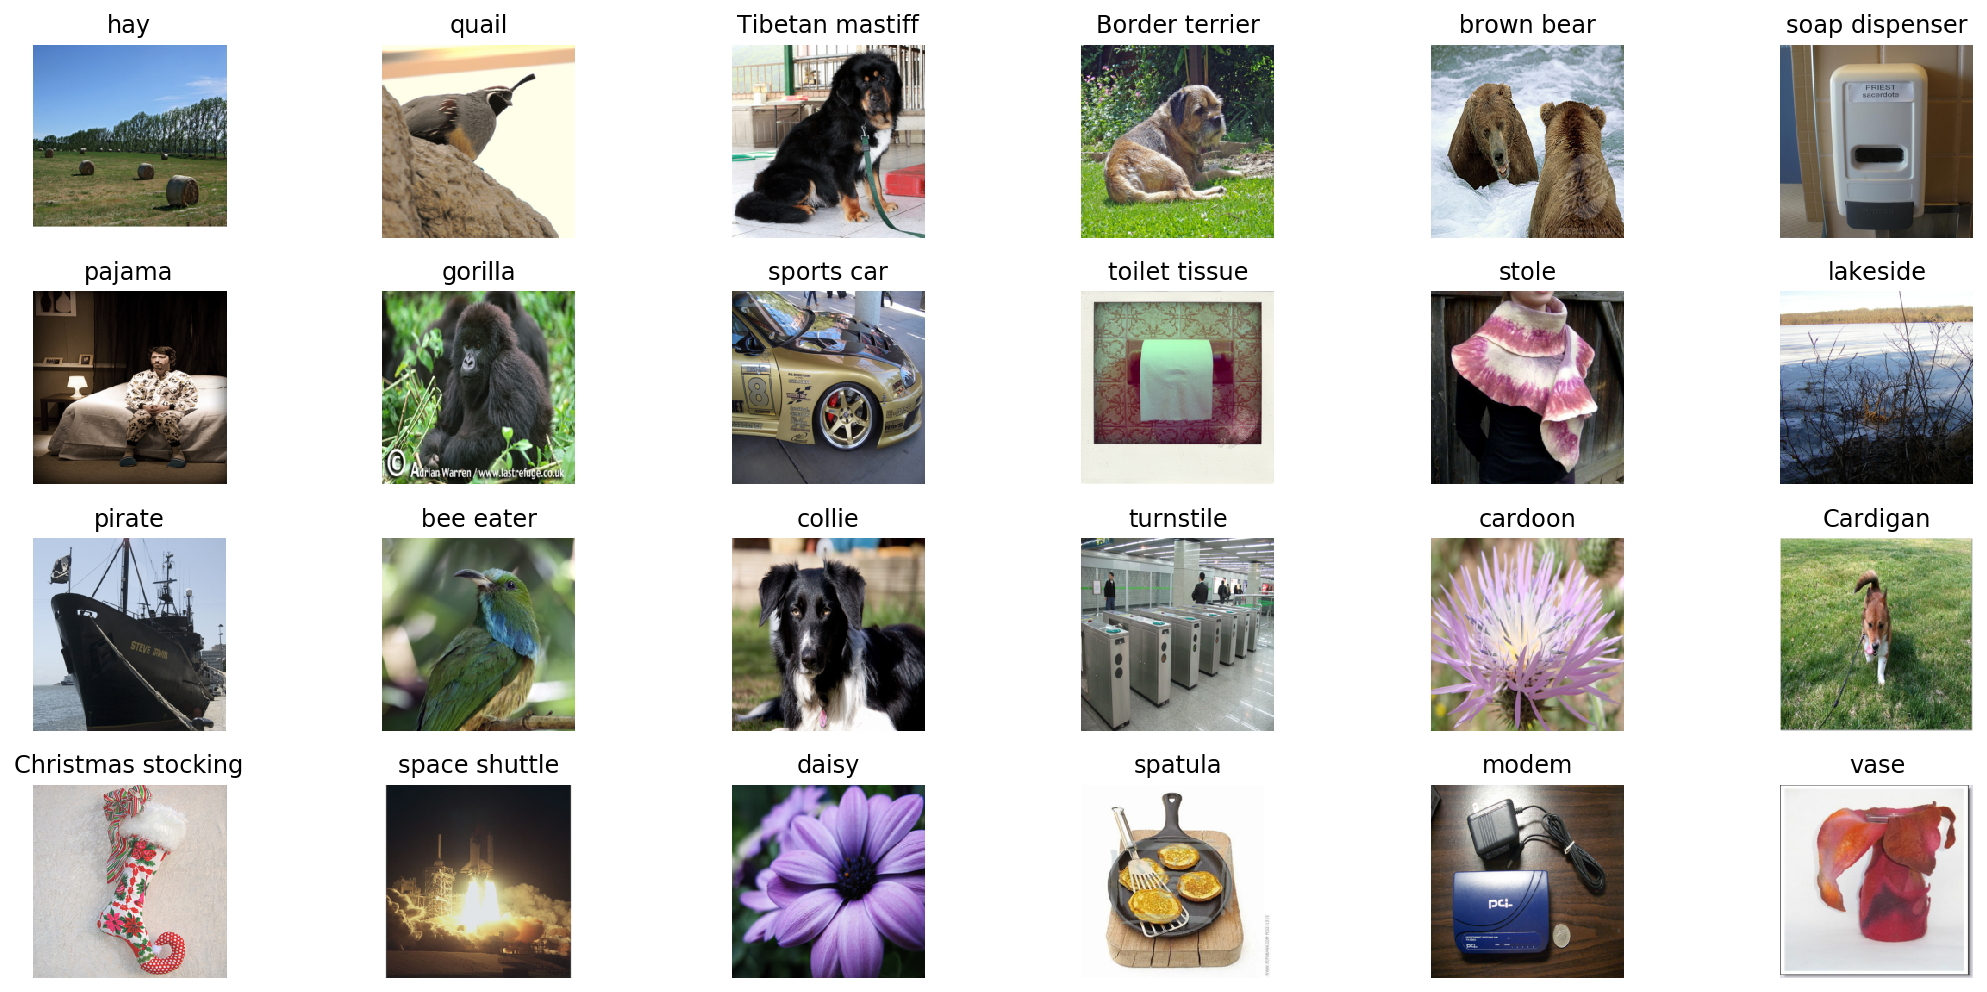

In [3]:
# Load example images: 25 images from ImageNet
f = np.load("data/imagenet_val_25.npz", allow_pickle=True)
data, target, class_names = f["X"], f["y"], f["label_map"].item()
class_names = {k: v.split(',')[0] for (k, v) in class_names.items()}

def show_images(savepath=None):
    plt.figure(figsize=(15, 7))
    for i in range(24):
        plt.subplot(4, 6, i + 1)
        plt.imshow(data[i])
        plt.title(class_names[target[i]])
        plt.axis('off')
    plt.gcf().tight_layout()
    if savepath: plt.savefig(savepath)
    plt.show()

show_images(savepath='figures/Images.jpeg')

## Saliency maps

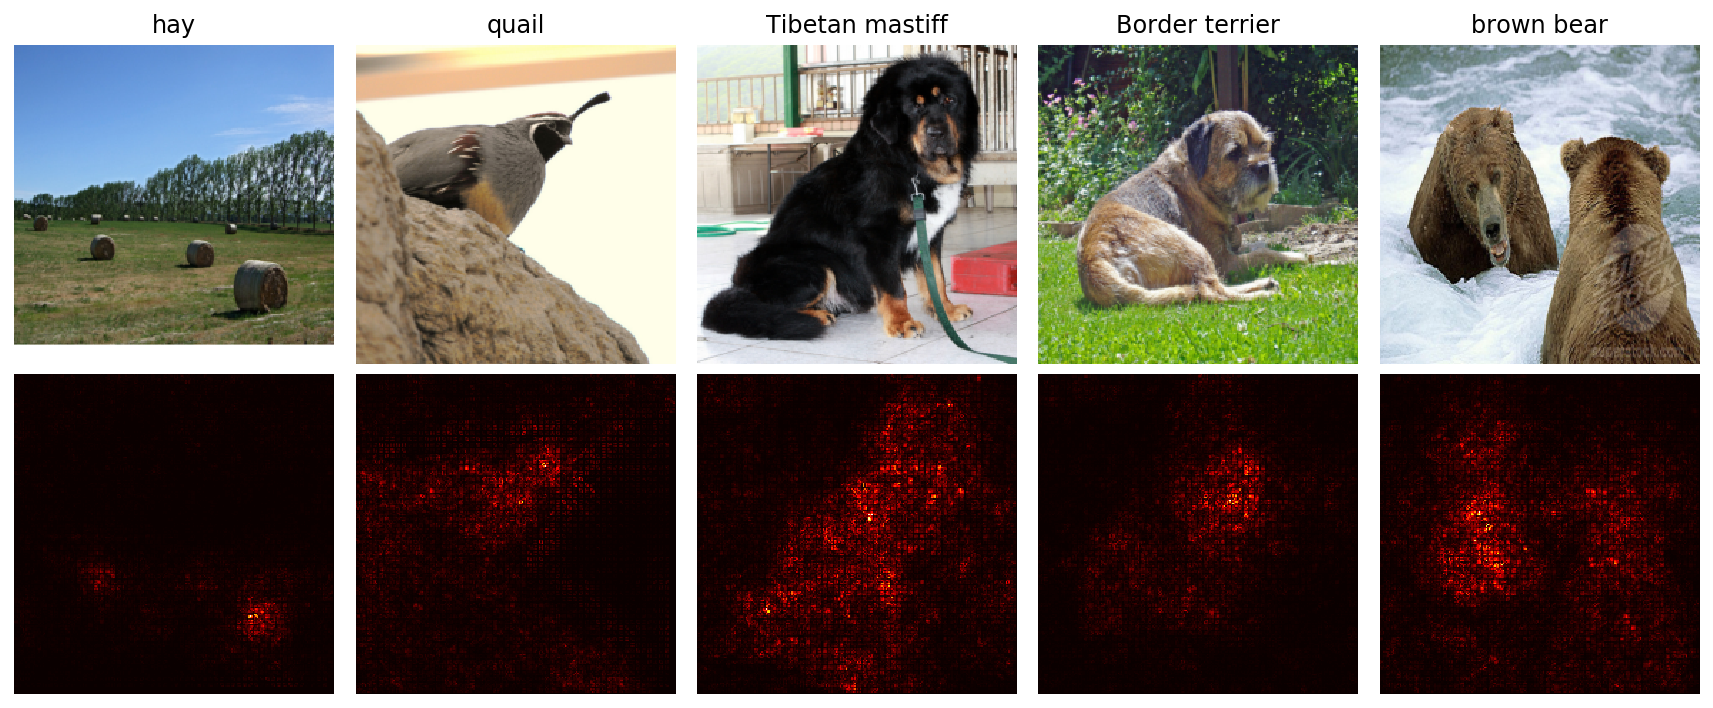

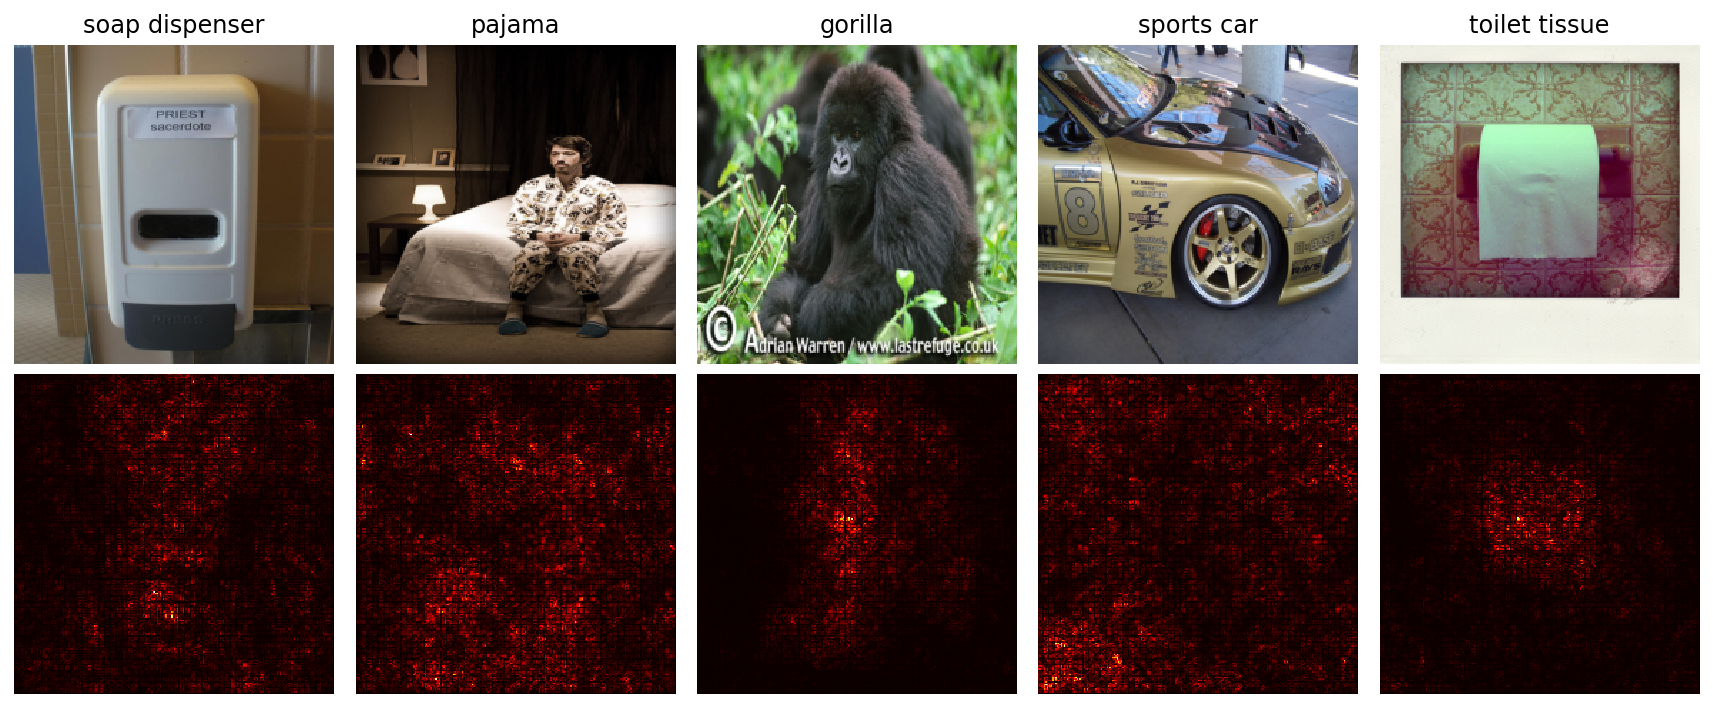

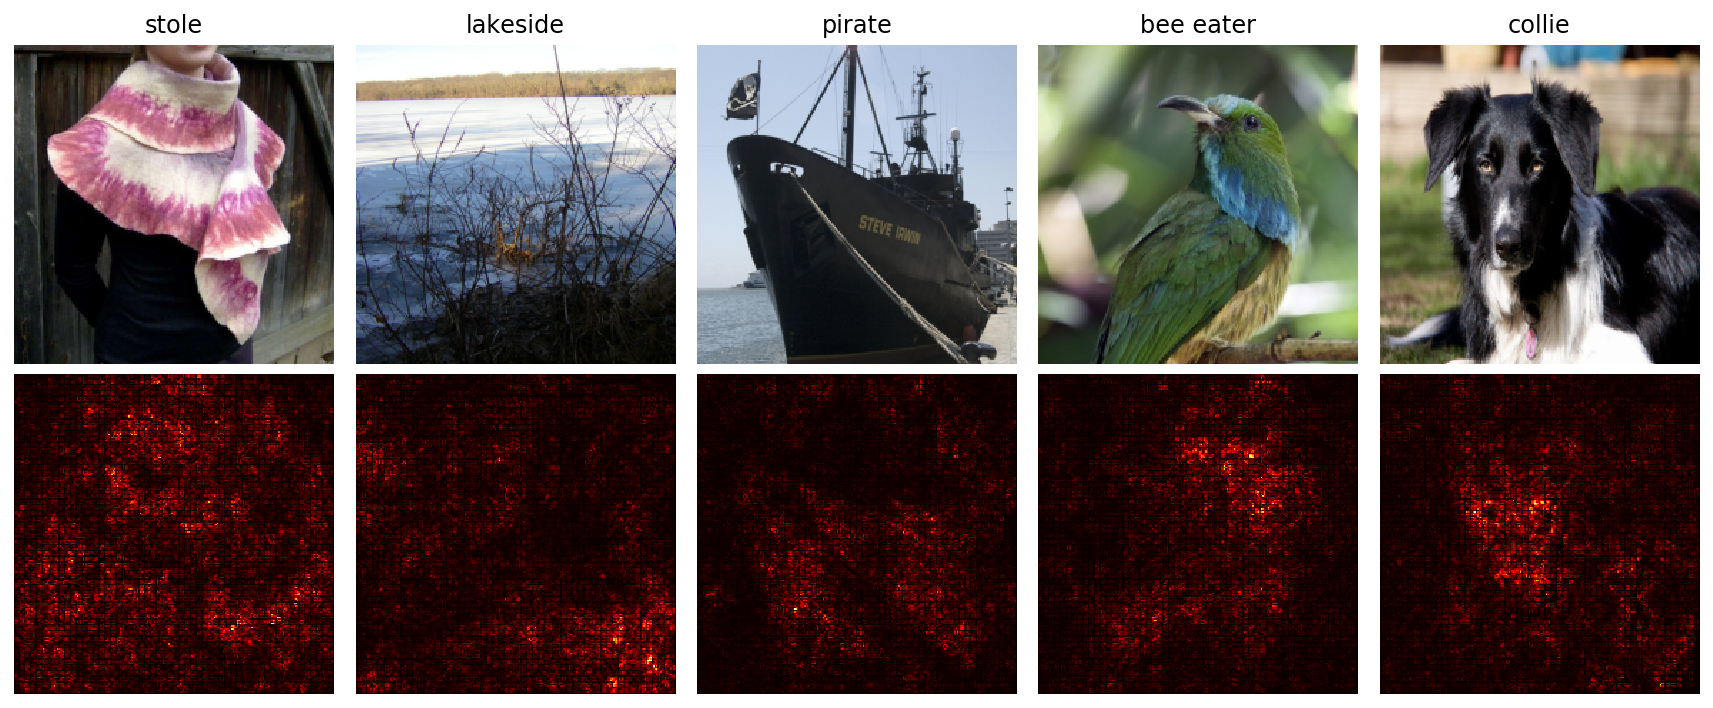

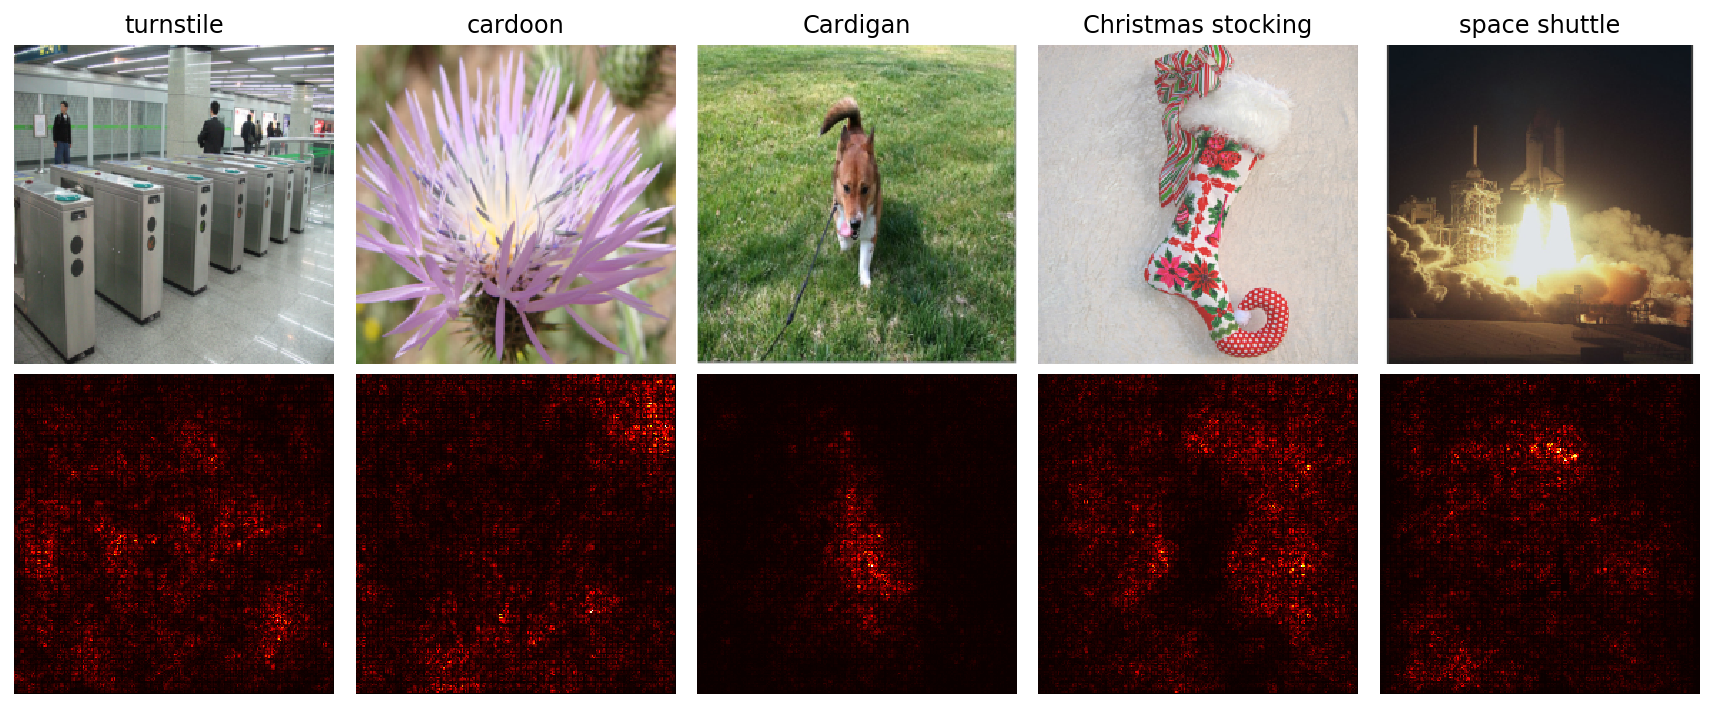

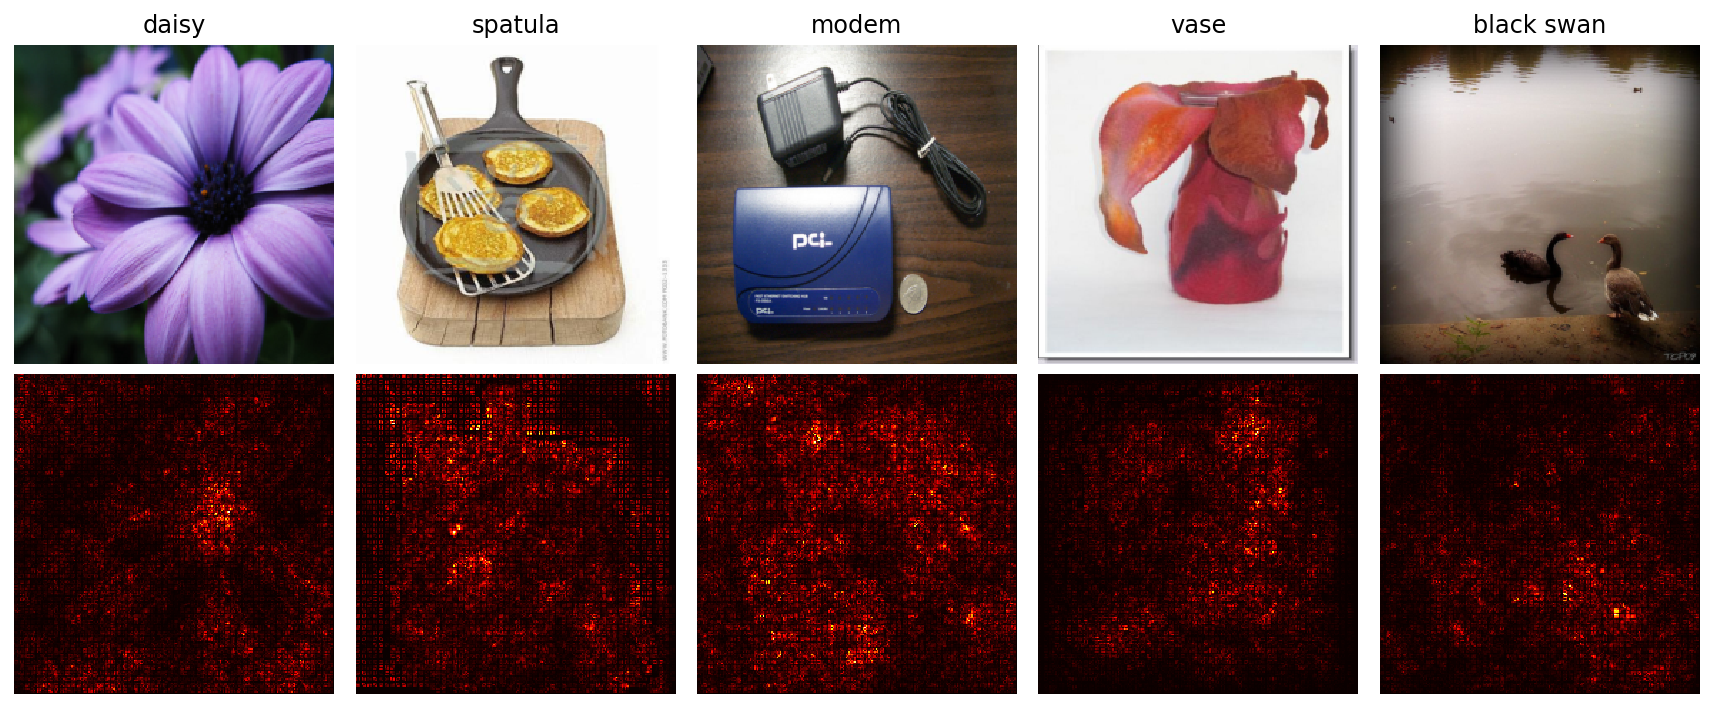

In [4]:
from saliency_maps import compute_saliency_maps

def show_saliency_maps(data, target, model, class_names, savepath=None):
    # convert data and target from numpy arrays to Torch Tensors
    data_tensor = torch.cat([preprocess(Image.fromarray(x)) for x in data], dim=0)
    target_tensor = torch.LongTensor(target)

    # compute saliency maps for images in X
    saliency = compute_saliency_maps(data_tensor, target_tensor, model)
    # convert the saliency map from torch.Tensor to numpy.array and show images
    # and saliency maps together.
    saliency = saliency.numpy()
    N = data.shape[0]
    for i in range(N):
        plt.subplot(2, N, i + 1)
        plt.imshow(data[i])
        plt.axis('off')
        plt.title(class_names[target[i]])
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(12, 5)
    plt.gcf().tight_layout()
    if savepath: plt.savefig(savepath)
    plt.show()

for i in range(5):
    show_saliency_maps(data[5*i: 5*i + 5], target[5*i: 5*i + 5], model, class_names,
                       savepath='./figures/Saliency-maps_batch{}'.format(i))